In [138]:
# ライブラリのインポート
import pandas as pd # 基本ライブラリ
import numpy as np # 基本ライブラリ
import matplotlib.pyplot as plt # グラフ描画用
import seaborn as sns; sns.set() # グラフ描画用
import lightgbm as lgb #LightGBM
from sklearn import datasets
from sklearn.model_selection import train_test_split # データセット分割用
from sklearn.metrics import mean_squared_error # モデル評価用(平均二乗誤差)
from sklearn.metrics import r2_score # モデル評価用(決定係数)

# データフレームを綺麗に出力する関数
import IPython
def display(*dfs, head=True):
    for df in dfs:
        IPython.display.display(df.head() if head else df)

In [140]:
# Boston データセットの読み込み
df = pd.read_csv("客滞データ.csv",)
# データの確認
print(df.shape) # データサイズの確認(データ数,特徴量数(変数の個数))
display(df) # df.head()に同じ(文中に入れるときはdisplay()を使う)

# 説明変数,目的変数
x = df.drop(['客滞',"機種名"],axis=1).values # 説明変数(CRIM以外の特徴量)
y = df['客滞'].values # 目的変数(CRIM)

# トレーニングデータ,テストデータの分割
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.20, random_state=2)

(171, 8)


,機種名,平均MY,単発率,客滞,初回平均T1Y,天国TY平均,玉粗,名目継続率
0,CR Ａｎｏｔｈｅｒ FPW,9200.0,0.39100,187.979592,472.7,1686.500,0.197551,0.610000
1,CR ＤＤ北斗の拳WAA,7700.0,0.49462,189.113636,240.4,1147.212,0.229545,0.685279
2,CR ＴＶアニメーション弱虫ペダルM2BZ5,9500.0,0.56400,169.205882,372.0,2371.500,0.197353,0.773000
3,CRAおそ松さん～ＴＨＥ・ＤＲＵＭ～KS,8000.0,NaN,164.285714,NaN,NaN,0.223214,0.622310
4,CRAさくらももこ劇場 ミラくるずきんちゃんGL,8500.0,NaN,183.724138,NaN,NaN,0.192414,0.712310


array([[7.00000000e+03,            nan,            nan,            nan,
        2.29677419e-01, 5.20893553e-01],
       [8.70000000e+03, 4.08650000e-01, 3.70000000e+02, 1.62370000e+03,
        1.96825397e-01, 7.12000000e-01],
       [9.00000000e+03, 5.38500000e-01, 2.99400000e+02, 2.07320000e+03,
        1.89591837e-01, 6.99000000e-01],
       [1.03000000e+04, 6.65930000e-01, 3.13000000e+02, 2.97468000e+03,
        2.29767442e-01, 8.02000000e-01],
       [8.60000000e+03, 3.22570000e-01, 4.15300000e+02, 1.67040000e+03,
        2.96666667e-01, 6.70000000e-01],
       [1.05000000e+04, 6.53610000e-01, 3.92600000e+02, 2.50740000e+03,
        2.50816327e-01, 8.10000000e-01],
       [8.50000000e+03,            nan,            nan,            nan,
        2.31538462e-01, 5.86624787e-01],
       [9.50000000e+03,            nan,            nan,            nan,
        2.31200000e-01, 6.45125528e-01],
       [1.01000000e+04, 5.34490000e-01, 2.22875000e+02, 2.09104000e+03,
        2.12500000e-01, 

In [141]:
# 学習に使用するデータを設定
lgb_train = lgb.Dataset(X_train, y_train)
lgb_eval = lgb.Dataset(X_test, y_test, reference=lgb_train)

# LightGBM parameters
params = {'task': 'train',
           'boosting_type': 'gbdt',
           'objective': 'regression', # 目的 : 回帰  
           'metric': {'rmse'}, # 評価指標 : rsme(平均二乗誤差の平方根) 
           }

# モデルの学習
model = lgb.train(params, # パラメータ
                  train_set=lgb_train, # トレーニングデータの指定
                  valid_sets=lgb_eval, # 検証データの指定
                  early_stopping_rounds=100 # 100回ごとに検証精度の改善を検討　→ 精度が改善しないなら学習を終了(過学習に陥るのを防ぐ)
                  )

# テストデータの予測
y_pred = model.predict(X_test)

[1]	valid_0's rmse: 10.2551
Training until validation scores don't improve for 100 rounds
[2]	valid_0's rmse: 9.91453
[3]	valid_0's rmse: 9.76317
[4]	valid_0's rmse: 9.44123
[5]	valid_0's rmse: 9.25655
[6]	valid_0's rmse: 9.22693
[7]	valid_0's rmse: 9.09461
[8]	valid_0's rmse: 9.08544
[9]	valid_0's rmse: 9.00728
[10]	valid_0's rmse: 8.9924
[11]	valid_0's rmse: 9.06968
[12]	valid_0's rmse: 9.09844
[13]	valid_0's rmse: 9.13566
[14]	valid_0's rmse: 9.22424
[15]	valid_0's rmse: 9.2782
[16]	valid_0's rmse: 9.2953
[17]	valid_0's rmse: 9.40397
[18]	valid_0's rmse: 9.43138
[19]	valid_0's rmse: 9.4864
[20]	valid_0's rmse: 9.5036
[21]	valid_0's rmse: 9.56983
[22]	valid_0's rmse: 9.61734
[23]	valid_0's rmse: 9.66506
[24]	valid_0's rmse: 9.73248
[25]	valid_0's rmse: 9.79079
[26]	valid_0's rmse: 9.85949
[27]	valid_0's rmse: 9.87605
[28]	valid_0's rmse: 9.93458
[29]	valid_0's rmse: 9.95158
[30]	valid_0's rmse: 9.96777
[31]	valid_0's rmse: 10.0458
[32]	valid_0's rmse: 10.0524
[33]	valid_0's rmse: 10.

,客滞,客滞予測値
0,148.095238,164.430902
1,171.607143,166.054857
2,168.500000,172.786009
3,170.632653,169.010198
4,151.190476,160.845006


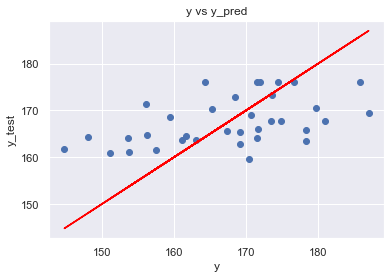

In [142]:
# 真値と予測値の表示
df_pred = pd.DataFrame({'客滞':y_test,'客滞予測値':y_pred})
display(df_pred)

# 散布図を描画(真値 vs 予測値)
plt.plot(y_test, y_test, color = 'red', label = 'x=y') # 直線y = x (真値と予測値が同じ場合は直線状に点がプロットされる)
plt.scatter(y_test, y_pred) # 散布図のプロット
plt.xlabel('y') # x軸ラベル
plt.ylabel('y_test') # y軸ラベル
plt.title('y vs y_pred') # グラフタイトル
df_pred.to_csv("predict_result.csv")

In [143]:
# モデル評価
# rmse : 平均二乗誤差の平方根
mse = mean_squared_error(y_test, y_pred) # MSE(平均二乗誤差)の算出
rmse = np.sqrt(mse) # RSME = √MSEの算出
print('RMSE :',rmse)

# r2 : 決定係数
r2 = r2_score(y_test,y_pred)
print('R2 :',r2)

RMSE : 8.992398953498371
R2 : 0.2340700552179309


In [144]:
# 重回帰分析
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression
import numpy as np
import statsmodels.api as sm

df_droped=df.dropna()
x = df_droped.drop(['客滞',"機種名"],axis=1) # 説明変数(CRIM以外の特徴量)
y = df_droped[['客滞']] # 目的変数(CRIM)
sscaler = preprocessing.StandardScaler()
sscaler.fit(x)
xss_sk = sscaler.transform(x) 
sscaler.fit(y)
yss_sk = sscaler.transform(y)

model_lr_std = LinearRegression()
model_lr_std.fit(xss_sk, yss_sk)

x_add_const = sm.add_constant(xss_sk)
model_sm = sm.OLS(yss_sk, x_add_const).fit()
print(model_sm.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.481
Model:                            OLS   Adj. R-squared:                  0.452
Method:                 Least Squares   F-statistic:                     16.39
Date:                Sun, 06 Sep 2020   Prob (F-statistic):           2.80e-13
Time:                        23:45:48   Log-Likelihood:                -123.26
No. Observations:                 113   AIC:                             260.5
Df Residuals:                     106   BIC:                             279.6
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.513e-15      0.070   2.16e-14      1.0

In [156]:
pred_df=pd.read_csv("客滞データのコピー2.csv")
pred_x = pred_df.drop(['客滞',"機種名"],axis=1) # 説明変数(CRIM以外の特徴量)
sscaler.fit(pred_x)
pred_x_sk = sscaler.transform(pred_x) 
pred_x_sk
y_pred=model_lr_std.predict(pred_x_sk)

ParserError: Error tokenizing data. C error: Expected 1 fields in line 15, saw 6


In [154]:
pred_x_sk

array([[ 0.04417609, -0.84693007,  1.3357781 , -0.50470584, -0.42799958,
        -0.88783771],
       [-1.12765293,  0.03452557, -1.06716847, -1.46008434,  0.06872947,
        -0.11684953],
       [ 0.2785419 ,  0.62471465,  0.29412196,  0.70880952, -0.43107486,
         0.78157724],
       ...,
       [-0.26831165,  0.38048968,  0.29929404, -0.61082201, -0.45207992,
        -0.06849295],
       [ 0.2785419 , -0.66284688,  0.34998039, -0.77327362,  0.97774317,
        -1.21557561],
       [ 0.98163932,  0.06804164, -0.28308173,  0.4053421 ,  0.97959144,
         1.08883152]])